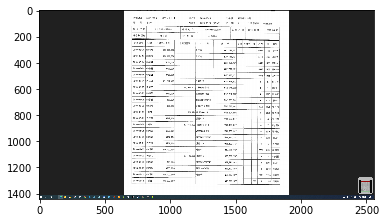

In [1]:
#현재 사용중인 화면 캡쳐하기
import numpy
from PIL import ImageGrab
import cv2
 
imgGrab = ImageGrab.grab(bbox=(0, 0, 2560, 1440))
 
cv_img = cv2.cvtColor(numpy.array(imgGrab), cv2.COLOR_RGB2BGR)
 
cv2.imshow('image',cv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(cv_img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img2)
plt.show()

In [1]:
import cv2
import numpy as np
def cropscan(img):
    win_name = 'scan'
    # 이미지 읽기
    #img = cv2.imread(img)
    cv2.imshow('original', img)
    cv2.waitKey(0)
    draw = img.copy()

    # 그레이스 스케일 변환 및 케니 엣지
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0) # 가우시안 블러로 노이즈 제거
    edged = cv2.Canny(gray, 75, 200)    # 케니 엣지로 경계 검출
    cv2.imshow(win_name, edged)
    cv2.waitKey(0)

    # 컨투어 찾기
    (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, \
                                                    cv2.CHAIN_APPROX_SIMPLE)
    # 모든 컨투어 그리기
    
    contour = cnts[0]
    # 전체 둘레의 0.05로 오차 범위 지정 ---②
    epsilon = 0.05 * cv2.arcLength(contour, True)
    # 근사 컨투어 계산 ---③
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # 각각 컨투어 선 그리기 ---④
#     cv2.drawContours(img, [contour], -1, (0,255,0), 3)
    cv2.drawContours(draw, [approx], -1, (0,255,0), 3)
#     cv2.drawContours(draw, cnts, -1, (0,255,0))
    cv2.imshow(win_name, draw)
    cv2.waitKey(0)

    # 컨투어들 중에 영역 크기 순으로 정렬
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
    for c in cnts:
        # 영역이 가장 큰 컨투어 부터 근사 컨투어 단순화
        peri = cv2.arcLength(c, True)   # 둘레 길이
        # 둘레 길이의 0.02 근사값으로 근사화
        vertices = cv2.approxPolyDP(c, 0.02 * peri, True) 
        if len(vertices) == 4: # 근사한 꼭지점이 4개면 중지
            break
    pts = vertices.reshape(4, 2) # N x 1 x 2 배열을 4 x 2크기로 조정
    for x,y in pts:
        cv2.circle(draw, (x,y), 10, (0,255,0), -1) # 좌표에 초록색 동그라미 표시
    cv2.imshow(win_name, draw)
    cv2.waitKey(0)
    merged = np.hstack((img, draw))

    #### 이하 [예제 5-8]과 동일 ####
    # 좌표 4개 중 상하좌우 찾기 ---② 
    sm = pts.sum(axis=1)                 # 4쌍의 좌표 각각 x+y 계산
    diff = np.diff(pts, axis = 1)       # 4쌍의 좌표 각각 x-y 계산

    topLeft = pts[np.argmin(sm)]         # x+y가 가장 값이 좌상단 좌표
    bottomRight = pts[np.argmax(sm)]     # x+y가 가장 큰 값이 좌상단 좌표
    topRight = pts[np.argmin(diff)]     # x-y가 가장 작은 것이 우상단 좌표
    bottomLeft = pts[np.argmax(diff)]   # x-y가 가장 큰 값이 좌하단 좌표

    # 변환 전 4개 좌표 
    pts1 = np.float32([topLeft, topRight, bottomRight , bottomLeft])

    # 변환 후 영상에 사용할 서류의 폭과 높이 계산 ---③ 
    w1 = abs(bottomRight[0] - bottomLeft[0])    # 상단 좌우 좌표간의 거리
    w2 = abs(topRight[0] - topLeft[0])          # 하당 좌우 좌표간의 거리
    h1 = abs(topRight[1] - bottomRight[1])      # 우측 상하 좌표간의 거리
    h2 = abs(topLeft[1] - bottomLeft[1])        # 좌측 상하 좌표간의 거리
    width = max([w1, w2])                       # 두 좌우 거리간의 최대값이 서류의 폭
    height = max([h1, h2])                      # 두 상하 거리간의 최대값이 서류의 높이

    # 변환 후 4개 좌표
    pts2 = np.float32([[0,0], [width-1,0], 
                        [width-1,height-1], [0,height-1]])

    # 변환 행렬 계산 
    mtrx = cv2.getPerspectiveTransform(pts1, pts2)
    # 원근 변환 적용
    result = cv2.warpPerspective(img, mtrx, (width, height))
    cv2.imshow(win_name, result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return result

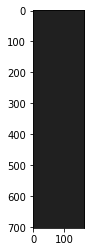

In [3]:

import numpy
from PIL import ImageGrab
import cv2
 
imgGrab = ImageGrab.grab(bbox=(0, 0, 2560, 1440))
 
cv_img = cv2.cvtColor(numpy.array(imgGrab), cv2.COLOR_RGB2BGR)
img=cropscan(cv_img) 
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(cv_img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(img2)
plt.imshow(img)
plt.show()

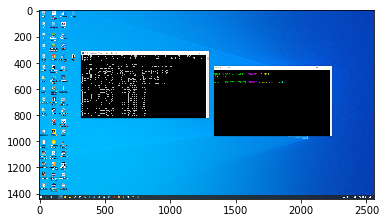

In [27]:
import numpy as np
import cv2

#현재 사용중인 화면 캡쳐하기
from PIL import ImageGrab
import cv2
 
imgGrab = ImageGrab.grab(bbox=(0, 0, 2560, 1440))
 
cv_img = cv2.cvtColor(np.array(imgGrab), cv2.COLOR_RGB2BGR)
 
cv2.imshow('image',cv_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(cv_img)   # img파일을 b,g,r로 분리
img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img2)
plt.show()



In [29]:
#이미지를 50줄 씩만 읽기
image = cv_img
lineLenth=50
readLines=0
count=1
while len(image)>readLines:
#     if len(image)<lineLenth*count:
#         x=1440
#     else:
#         x=lineLenth*count
    cropped = image[readLines:lineLenth*count,0:2560]
    cv2.imshow("cropped line", cropped)
    readLines=readLines+lineLenth
    count=count+1
    #cv2.imshow("Original", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
import win32gui, win32ui, win32con, win32api
hwin = win32gui.GetDesktopWindow()
width = win32api.GetSystemMetrics(win32con.SM_CXVIRTUALSCREEN)
height = win32api.GetSystemMetrics(win32con.SM_CYVIRTUALSCREEN)
left = win32api.GetSystemMetrics(win32con.SM_XVIRTUALSCREEN)
top = win32api.GetSystemMetrics(win32con.SM_YVIRTUALSCREEN)
hwindc = win32gui.GetWindowDC(hwin)
srcdc = win32ui.CreateDCFromHandle(hwindc)
memdc = srcdc.CreateCompatibleDC()
bmp = win32ui.CreateBitmap()
bmp.CreateCompatibleBitmap(srcdc, width, height)
memdc.SelectObject(bmp)
memdc.BitBlt((0, 0), (width, height), srcdc, (left, top), win32con.SRCCOPY)
bmp.SaveBitmapFile(memdc, 'screenshot.bmp')

In [9]:
import numpy as np
import cv2
from mss import mss
from PIL import Image

mon = {'top': 160, 'left': 160, 'width': 200, 'height': 200}

sct = mss()

while 1:
    sct.get_pixels(mon)
    img = Image.frombytes('RGB', (sct.width, sct.height), sct.image)
    cv2.imshow('test', np.array(img))
    if cv2.waitKey(25) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

AttributeError: 'MSS' object has no attribute 'width'

In [ ]:
!pip uninstall mss

In [ ]:
!pip install mss==2.0.22